In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
os.chdir(r'C:\Users\shubham\Desktop\case_study_python\6 Supervised Learning')

In [2]:
dataset = pd.read_csv('loan_borowwer_data.csv')

In [3]:
dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
dataset['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

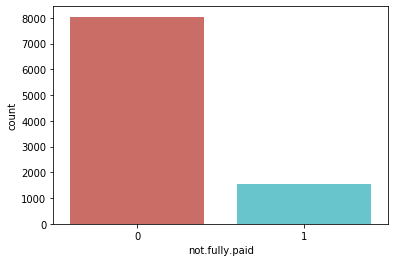

In [6]:
sns.countplot(x='not.fully.paid',data = dataset , palette = 'hls')

In [7]:
dataset.groupby(['not.fully.paid']).mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,
0,0.832318,0.120770,314.574123,10.941091,12.494413,713.326911,4592.632624,16122.724425,45.759608,1.433934,0.161591,0.056557
1,0.661448,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324


In [8]:
dataset.groupby(['purpose']).mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
purpose,,,,,,,,,,,,,
all_other,0.787216,0.116771,244.937542,10.845313,11.079498,715.344058,4311.706153,12883.039897,39.712321,1.646504,0.179751,0.048048,0.166023
credit_card,0.808241,0.119738,319.500713,11.047230,14.099398,709.626783,4857.005943,23180.020602,53.600475,1.387480,0.151347,0.072108,0.115689
debt_consolidation,0.814506,0.126595,358.984390,10.912909,14.076462,703.871367,4533.037139,17146.710639,54.125504,1.461461,0.163255,0.070508,0.152388
educational,0.740525,0.119907,217.547201,10.549956,11.344927,708.282799,4008.595724,10828.897959,38.801166,1.854227,0.157434,0.043732,0.201166
home_improvement,0.813990,0.117507,337.071590,11.201979,10.197504,724.806041,5201.995562,17328.756757,34.274626,1.941176,0.136725,0.066773,0.170111
major_purchase,0.848970,0.114171,243.483913,10.844895,10.159886,722.503432,4325.969108,7281.453089,32.457895,1.562929,0.173913,0.048055,0.112128
small_business,0.799677,0.138087,433.826607,11.146216,10.793296,719.988691,4892.115778,27581.203554,40.070436,1.933764,0.155089,0.056543,0.277868


In [9]:
dataset=dataset.rename(columns={"not.fully.paid": "y"})

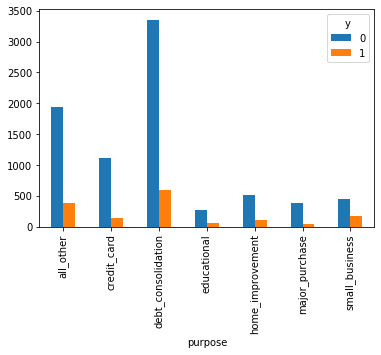

In [10]:
pd.crosstab(dataset.purpose,dataset.y).plot(kind='bar')


In [11]:
cat_vars=['purpose']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dataset[var], prefix=var)
    data1=dataset.join(cat_list)
    dataset=data1
cat_vars=['purpose']
data_vars=dataset.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [12]:
data_final=dataset[to_keep]
data_final.columns.values

array(['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'y',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'], dtype=object)

In [13]:
data_final

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [14]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  11278
Number of no subscription in oversampled data 5639
Number of subscription 5639
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [15]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.387345
         Iterations 10
                              Results: Logit
Model:                   Logit               Pseudo R-squared:    0.441    
Dependent Variable:      y                   AIC:                 8774.9619
Date:                    2020-06-10 14:48    BIC:                 8914.2435
No. Observations:        11278               Log-Likelihood:      -4368.5  
Df Model:                18                  LL-Null:             -7817.3  
Df Residuals:            11259               LLR p-value:         0.0000   
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          10.0000                                           
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
credit.policy   

In [17]:
cols = ['credit.policy','int.rate','log.annual.inc','fico','revol.util','delinq.2yrs','pub.rec','purpose_all_other','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business']
X=os_data_X[cols]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.387647
         Iterations 10
                              Results: Logit
Model:                   Logit               Pseudo R-squared:    0.441    
Dependent Variable:      y                   AIC:                 8771.7660
Date:                    2020-06-10 14:48    BIC:                 8874.3946
No. Observations:        11278               Log-Likelihood:      -4371.9  
Df Model:                13                  LL-Null:             -7817.3  
Df Residuals:            11264               LLR p-value:         0.0000   
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          10.0000                                           
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
credit.policy   

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1515  175]
 [ 426 1268]]


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.7819148936170213

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train,y_train)
y_pred_rf=clf_rf.predict(X_test)


In [30]:
metrics.accuracy_score(y_test, y_pred_rf)

0.8475177304964538

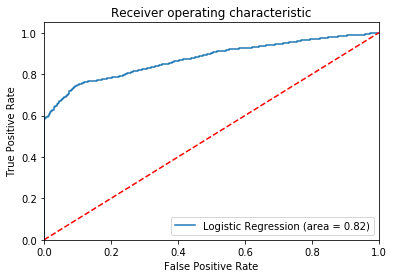

In [32]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()